In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
import casadi as cs
import matplotlib.pyplot as plt
import matplotlib
from toppysail.utils import util_functions as ut
from casadi_kinodynamics.utils import symbolic_robot
from toppysail.casadi_dev import nlps
from toppysail.casadi_dev import opt_problem_formulations

In [3]:
with open('../../../data_lab_04.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [11]:
font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [5]:
len_opt = []
len_pred = []
for iteration in b:
    qi = iteration['qi']
    qf = iteration['qf']
    q = iteration['q']
    dq = iteration['dq']
    q_msr = iteration['q_msr']

    N = 14
    sym_robot = symbolic_robot.symbolic_robot(robot_name='IRB1100_4_058',
                                              tool_mass=0.,
                                              tool_frame=[0., 0., 0.25, 0., 0., 0.],
                                              tool_cog=[0.0, 0., 0.],
                                              tool_inertia=[0., 0., 0., 0., 0., 0.],
                                              load_casadi_fnc=True)

    # generate a problem
    problem = opt_problem_formulations.problem_136b_X_q_qd_dt_U_qdd(sym_robot)

    nlp_params = nlps.Parameters(N=N, cost_coeff_jerk=1e-7)

    # generate nlp from the problem and solve it
    sol = nlps.generate_and_solve_nlp(problem, qi=qi.tolist(), qf=qf.tolist(),  p=nlp_params)

    # interpolate the optimal solution
    sol_intrp = problem.interpolate_solution(sol, dt_resample=0.004)
    
    len_opt.append( len(sol_intrp["q"]) )
    len_pred.append( len(q) )

Problem model generated. 
NLP with 285 variables and 434 constraints generated.
Solver instantiated.

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      820
Number of nonzeros in inequality constraint Jacobian.:     2892
Number of nonzeros in Lagrangian Hessian.............:     1816

Total number of variables............................:      249
                     variables with only lower bounds:       15
                variables with lower and upper 

Problem model generated. 
NLP with 285 variables and 434 constraints generated.
Solver instantiated.
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      820
Number of nonzeros in inequality constraint Jacobian.:     2892
Number of nonzeros in Lagrangian Hessian.............:     1816

Total number of variables............................:      249
                     variables with only lower bounds:       15
                variables with lower and upper bounds:      156
                     variables with only upper bounds:        0
Total number of equality constraints.................:      182
Total number of inequality constraints...............:      252
        inequality constraints with only lower bounds:       84
   inequality constraints with lower and upper bounds:       84
        inequality constraints with only upper boun

Solver instantiated.
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      820
Number of nonzeros in inequality constraint Jacobian.:     2892
Number of nonzeros in Lagrangian Hessian.............:     1816

Total number of variables............................:      249
                     variables with only lower bounds:       15
                variables with lower and upper bounds:      156
                     variables with only upper bounds:        0
Total number of equality constraints.................:      182
Total number of inequality constraints...............:      252
        inequality constraints with only lower bounds:       84
   inequality constraints with lower and upper bounds:       84
        inequality constraints with only upper bounds:       84

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_d

Solver instantiated.
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      820
Number of nonzeros in inequality constraint Jacobian.:     2892
Number of nonzeros in Lagrangian Hessian.............:     1816

Total number of variables............................:      249
                     variables with only lower bounds:       15
                variables with lower and upper bounds:      156
                     variables with only upper bounds:        0
Total number of equality constraints.................:      182
Total number of inequality constraints...............:      252
        inequality constraints with only lower bounds:       84
   inequality constraints with lower and upper bounds:       84
        inequality constraints with only upper bounds:       84

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_d

Solver instantiated.
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      820
Number of nonzeros in inequality constraint Jacobian.:     2892
Number of nonzeros in Lagrangian Hessian.............:     1816

Total number of variables............................:      249
                     variables with only lower bounds:       15
                variables with lower and upper bounds:      156
                     variables with only upper bounds:        0
Total number of equality constraints.................:      182
Total number of inequality constraints...............:      252
        inequality constraints with only lower bounds:       84
   inequality constraints with lower and upper bounds:       84
        inequality constraints with only upper bounds:       84

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_d

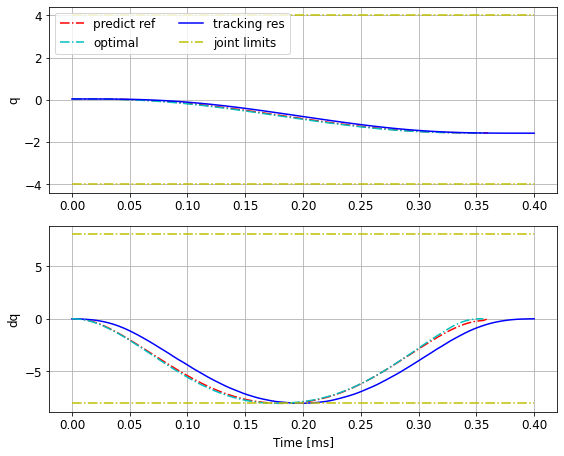

In [17]:
q_m = q_msr[10:20+len(q)] * np.pi/180
dq_m = np.gradient(q_m, axis=0) / 0.004

t_m = np.arange(len(q_m)) * 0.004
t_r = np.arange(len(q)) * 0.004
t_o = np.arange(len(sol_intrp["q"][:,0])) * 0.004
plt.figure(figsize=[8,6.5])
plt.subplot(211)
plt.plot(t_r, q[:,0], '-.r', label='predict ref')
plt.plot(t_o, sol_intrp["q"][:,0], '-.c', label='optimal')
plt.grid()
plt.plot(t_m, q_m[:,0], '-b', label='tracking res')
plt.plot(t_m, np.ones_like(t_m)*sym_robot.q_min[0], '-.y', label="joint limits")
plt.plot(t_m, np.ones_like(t_m)*sym_robot.q_max[0], '-.y')
plt.ylabel("q")
plt.legend(loc="upper left", ncol=2)
plt.subplot(212)
# dq_ = np.concatenate([np.zeros([6,6]), dq])
plt.plot(t_r, dq[:,0], '-.r')
plt.plot(t_m, dq_m[:,0], '-b')
plt.plot(t_o, sol_intrp["qd"][:,0], '-.c')
plt.plot(t_m, np.ones_like(t_m)*sym_robot.qd_max[0], '-.y', label="joint limits")
plt.plot(t_m, -np.ones_like(t_m)*sym_robot.qd_max[0], '-.y')
plt.grid()
plt.xlabel("Time [ms]")
plt.ylabel("dq")
plt.tight_layout()
plt.savefig("../../plots/ordinary/lab_res_2.jpg", dpi=200)

In [8]:
opt_t = np.array(len_opt) * 0.004
pred_t = np.array(len_pred) * 0.004
subopt = 100 * np.sum(pred_t - opt_t) / np.sum(opt_t)
subopt

1.472392638036808

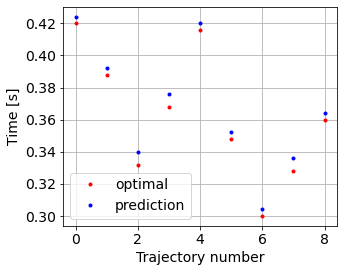

In [9]:
plt.figure(figsize=[5,4])
plt.plot(opt_t, 'r.', label="optimal")
plt.plot(pred_t, 'b.', label="prediction")
plt.xlabel("Trajectory number")
plt.ylabel("Time [s]")
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig("../../plots/ordinary/traj_speed.jpg", dpi = 200)
plt.show()